# Detecção do sinal do bóson de Higgs
## Victor Hugo Videira Miranda 

O bóson de Higgs é uma partícula fundamental do modelo padrão da física (modelo que melhor descreve as interações fundamentais da realidade como conhecemos atualmente). Ela é creditada por dar massa para as coisas, e possui tremendo valor de investigação científica na física de partículas. 

O método de produzir e detectar essa partícula é através de aceleradores, estruturas grandes que aceleram partículas a 99,9% da velocidade da luz, fazendo com que se choquem e dando origem a novas sub-partículas que podem decair rapidamente em outras partículas. No caso deste bóson temos que ele é produzido a partir de uma colisão próton-próton, que gera um bóson de Higgs (que decai muito rapidamente) e após isso decai em outras partículas, então os dados do banco de dados são dos produtos de decaimento, e não do bóson em si.

No banco de dados temos sinais de fundo, eventos irrelevantes ao bóson de Higgs que acontecem devido a colisão (formação de outras partículas, como neutrinos), e sinas verdadeiros de Higgs. O objetivo é encontrar a região no espaço que produz significativamente mais eventos de Higgs do que sinais de fundo, pois a partir disso consegue-se indicar a descoberta de novas partículas. Para otimizar a região de seleção no espaço, técnicas de classificação multivariada são utilizadas com a finalidade de separar os sinas de Higgs dos de fundo.

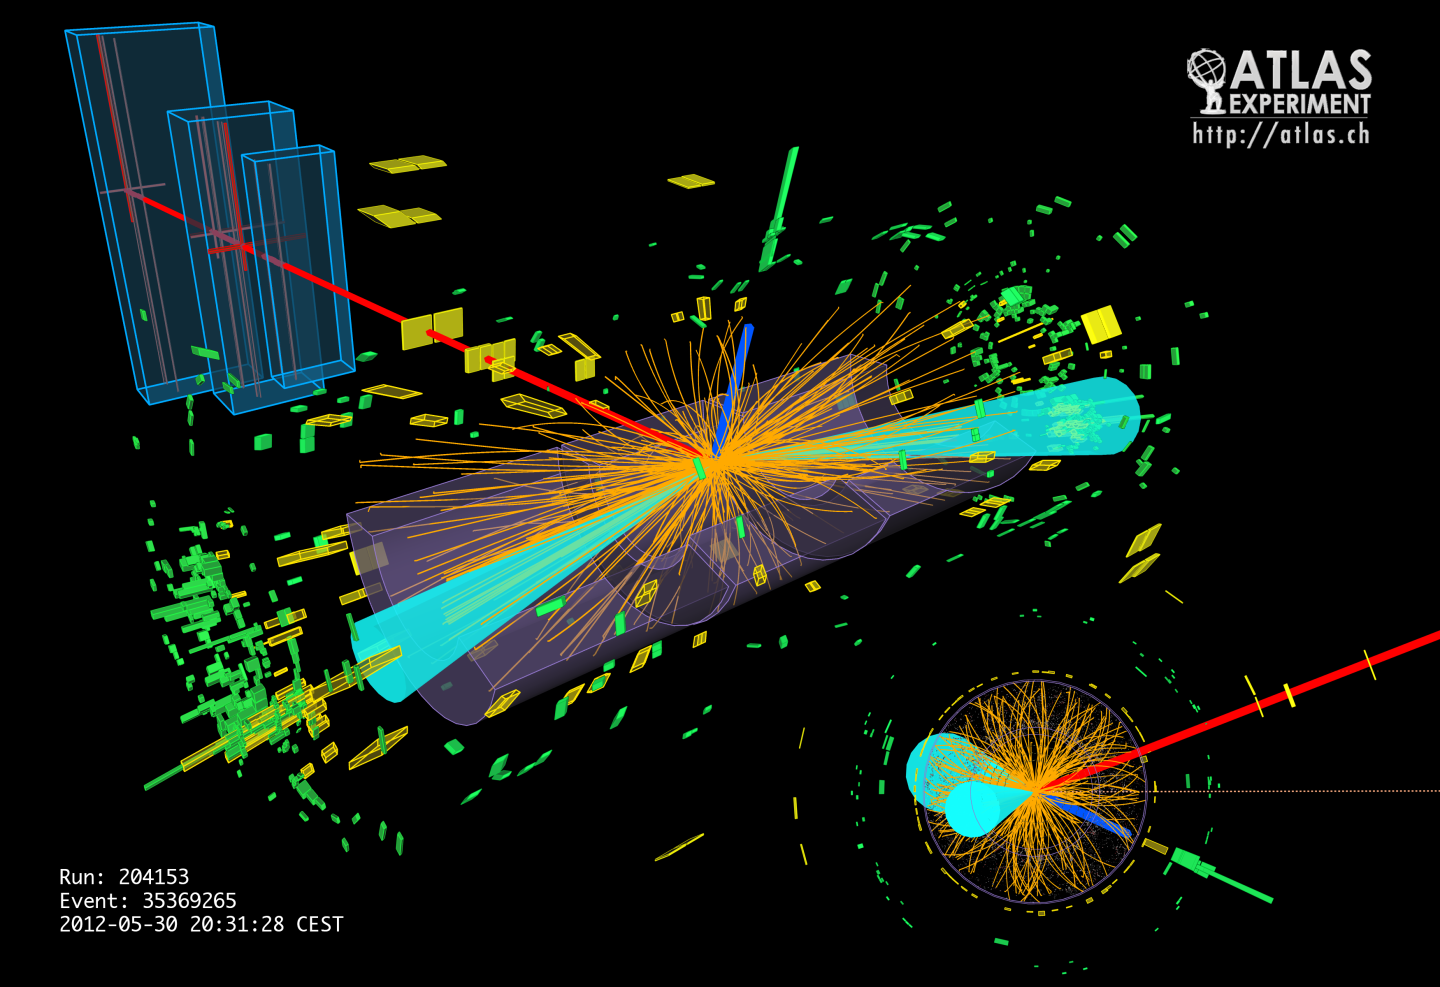

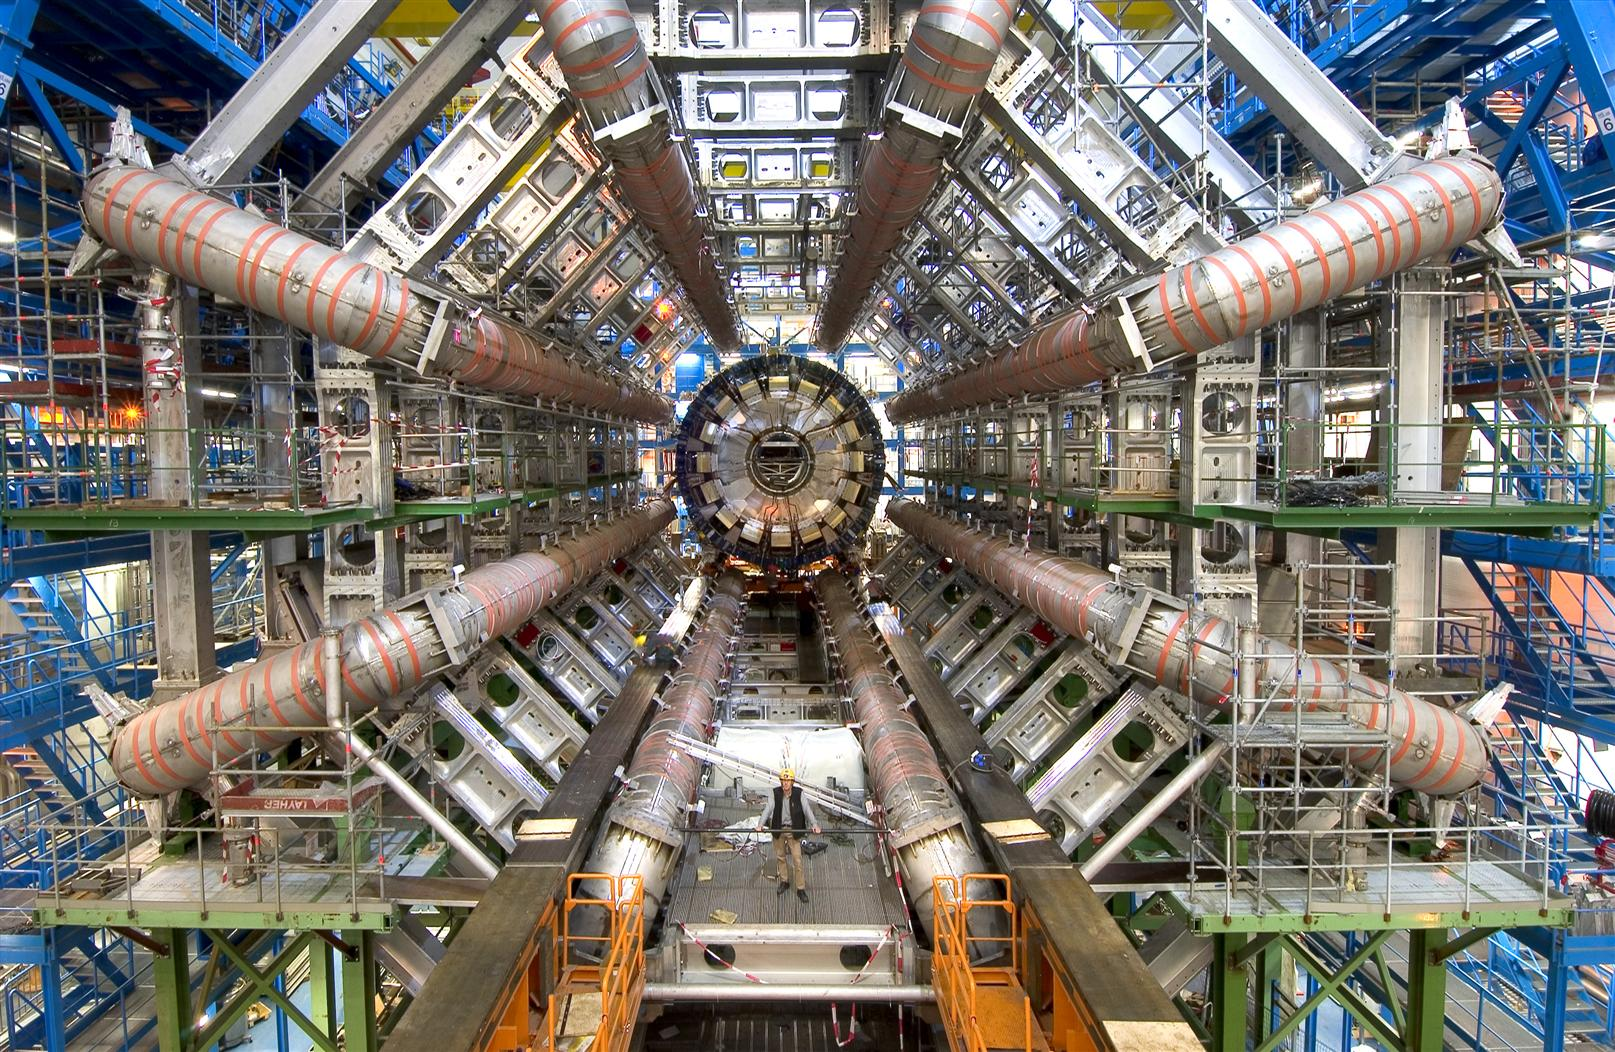

# Importar bibliotecas

In [20]:
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import normalize
from matplotlib import pyplot as plt
import seaborn as sb 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

%matplotlib inline
from matplotlib import rcParams
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

# Análise exploratória dos dados

No começo foi feita uma análise exploratória dos dados, para compreender e tentar ver algum padrão na estrutura dos dados, verificar dados faltantes ou anomalias e ver relações entre colunas de dados.

In [21]:
dados = pd.read_csv('training.csv', header=0, decimal='.', sep=',')

dados.head(10)

EventId  DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0   100000       138.470                       51.655        97.827    27.980   
1   100001       160.937                       68.768       103.235    48.146   
2   100002      -999.000                      162.172       125.953    35.635   
3   100003       143.905                       81.417        80.943     0.414   
4   100004       175.864                       16.915       134.805    16.405   
5   100005        89.744                       13.550        59.149   116.344   
6   100006       148.754                       28.862       107.782   106.130   
7   100007       154.916                       10.418        94.714    29.169   
8   100008       105.594                       50.559       100.989     4.288   
9   100009       128.053                       88.941        69.272   193.392   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                 0.910           124.711                2.666   
1              -999.000          -999.000             -999.000   
2              -999.000          -999.000             -999.000   
3              -999.000          -999.000             -999.000   
4              -999.000          -999.000             -999.000   
5                 2.636           284.584               -0.540   
6                 0.733           158.359                0.113   
7              -999.000          -999.000             -999.000   
8              -999.000          -999.000             -999.000   
9              -999.000          -999.000             -999.000   

   DER_deltar_tau_lep  DER_pt_tot  ...  PRI_jet_num  PRI_jet_leading_pt  \
0               3.064      41.928  ...            2              67.435   
1               3.473       2.078  ...            1              46.226   
2               3.148       9.336  ...            1              44.251   
3               3.310       0.414  ...            0            -999.000   
4               3.891      16.405  ...            0            -999.000   
5               1.362      61.619  ...            3              90.547   
6               2.941       2.545  ...            2             123.010   
7               2.897       1.526  ...            1              30.638   
8               2.904       4.288  ...            0            -999.000   
9               1.609      28.859  ...            1             167.735   

   PRI_jet_leading_eta  PRI_jet_leading_phi  PRI_jet_subleading_pt  \
0                2.150                0.444                 46.062   
1                0.725                1.158               -999.000   
2                2.053               -2.028               -999.000   
3             -999.000             -999.000               -999.000   
4             -999.000             -999.000               -999.000   
5               -2.412               -0.653                 56.165   
6                0.864                1.450                 56.867   
7               -0.715               -1.724               -999.000   
8             -999.000             -999.000               -999.000   
9               -2.767               -2.514               -999.000   

   PRI_jet_subleading_eta  PRI_jet_subleading_phi  PRI_jet_all_pt    Weight  \
0                   1.240                  -2.475         113.497  0.002653   
1                -999.000                -999.000          46.226  2.233584   
2                -999.000                -999.000          44.251  2.347389   
3                -999.000                -999.000          -0.000  5.446378   
4                -999.000                -999.000           0.000  6.245333   
5                   0.224                   3.106         193.660  0.083414   
6                   0.131                  -2.767         179.877  0.002653   
7                -999.000                -999.000          30.638  0.018636   
8                -999.000                -999.000           0.000  5.296003 

In [60]:
# Contagem de observacoes
len(dados)

250000

In [61]:
dados.dtypes

EventId                          int64
DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                      int64
PRI_jet_leading_pt             float64
PRI_jet_leading_eta      

Vemos que os dados contam com 250.000 registros que estão distribuídos em 33 colunas, sendo que os dados já estão previamente rotulados em 's' para o sinal de Higgs e 'b' para o sinal de fundo (background). Também temos a coluna 'Weight', que é uma ponderação feita pelo próprio simulador e não deve ser usada para o processo de classificação.

Adicionalmente, também vemos muitos valores anormais, -999.000. Estes dados possuem uma clara estrutura; a maioria está relacionada a propriedades de jatos hadrônicos no detector, logo, se o evento da colisão não contém jatos (jatos são cones estreitos de hádrons e outras partículas produzidas pela hadronização de um quark) todos os valores relacionados a jatos (*DER_deltaeta_jet_jet, DER_mass_jet_jet, DER_prodeta_jet_jet, PRI_jet_leading_pt, PRI_jet_leading_eta, PRI_jet_leading_phi, PRI_jet_subleading_pt, PRI_jet_subleading_eta , PRI_jet_subleading_phi e PRI_jet_all_pt* ) são faltantes, em virtude de simplesmente não existirem na colisão presenciada. Abaixo temos uma descrição dos dados faltantes e o que será feito com eles.

Mas primeiro é necessário substituir os -999.000 por NaN para fazer uma análise mais detalhada.

In [22]:
dados_analise = pd.DataFrame()

dados_analise = dados.drop(columns=['EventId', 'Weight'])

dados_analise.replace(to_replace=-999.000, value=np.nan, inplace=True)

dados_analise.head(5)

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0       138.470                       51.655        97.827    27.980   
1       160.937                       68.768       103.235    48.146   
2           NaN                      162.172       125.953    35.635   
3       143.905                       81.417        80.943     0.414   
4       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1                   NaN               NaN                  NaN   
2                   NaN               NaN                  NaN   
3                   NaN               NaN                  NaN   
4                   NaN               NaN                  NaN   

   DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  ...  PRI_met_sumet  \
0               3.064      41.928     197.760  ...        258.733   
1               3.473       2.078     125.157  ...        164.546   
2               3.148       9.336     197.814  ...        260.414   
3               3.310       0.414      75.968  ...         86.062   
4               3.891      16.405      57.983  ...         53.131   

   PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  PRI_jet_leading_phi  \
0            2              67.435                2.150                0.444   
1            1              46.226                0.725                1.158   
2            1              44.251                2.053               -2.028   
3            0                 NaN                  NaN                  NaN   
4            0                 NaN                  NaN                  NaN   

   PRI_jet_subleading_pt  PRI_jet_subleading_eta  PRI_jet_subleading_phi  \
0                 46.062                    1.24                  -2.475   
1                    NaN                     NaN                     NaN   
2                    NaN                     NaN                     NaN   
3                    NaN                     NaN                     NaN   
4                    NaN                     NaN                     NaN   

   PRI_jet_all_pt  Label  
0         113.497      s  
1          46.226      b  
2          44.251      b  
3          -0.000      b  
4           0.000      b  

[5 rows x 31 columns]

In [29]:
dados_analise.isna().sum()

DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177457
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta             99913
PRI_jet_leading_phi             99913
PRI_jet_subl

In [23]:
def faltantes( df ):
    colunas_muitos_dados_faltantes = []
    colunas_poucos_dados_faltantes_5 = []
    colunas_entre_5_e_30 = []
    missing_values_features = []
    for coluna in df.columns.values:
        print( "Coluna: ", coluna )
        porcentagem = np.round(df[coluna].isnull().sum()/df[coluna].shape[0]*100,2)
        print('Porcentagem de valores faltantes: ', porcentagem )
    
        if porcentagem>=30:
            colunas_muitos_dados_faltantes.append( coluna )
        elif porcentagem<=5:
            colunas_poucos_dados_faltantes_5.append( coluna )
        else:
            colunas_entre_5_e_30.append(coluna )
            
        print("\n")
    return colunas_poucos_dados_faltantes_5, colunas_entre_5_e_30,  colunas_muitos_dados_faltantes

colunas_poucos_dados_faltantes_5, colunas_entre_5_e_30,  colunas_muitos_dados_faltantes = faltantes(dados_analise)


Coluna:  DER_mass_MMC
Porcentagem de valores faltantes:  15.25


Coluna:  DER_mass_transverse_met_lep
Porcentagem de valores faltantes:  0.0


Coluna:  DER_mass_vis
Porcentagem de valores faltantes:  0.0


Coluna:  DER_pt_h
Porcentagem de valores faltantes:  0.0


Coluna:  DER_deltaeta_jet_jet
Porcentagem de valores faltantes:  70.98


Coluna:  DER_mass_jet_jet
Porcentagem de valores faltantes:  70.98


Coluna:  DER_prodeta_jet_jet
Porcentagem de valores faltantes:  70.98


Coluna:  DER_deltar_tau_lep
Porcentagem de valores faltantes:  0.0


Coluna:  DER_pt_tot
Porcentagem de valores faltantes:  0.0


Coluna:  DER_sum_pt
Porcentagem de valores faltantes:  0.0


Coluna:  DER_pt_ratio_lep_tau
Porcentagem de valores faltantes:  0.0


Coluna:  DER_met_phi_centrality
Porcentagem de valores faltantes:  0.0


Coluna:  DER_lep_eta_centrality
Porcentagem de valores faltantes:  70.98


Coluna:  PRI_tau_pt
Porcentagem de valores faltantes:  0.0


Coluna:  PRI_tau_eta
Porcentagem de valores faltan

Então, sabemos que as seguintes colunas possuem altas porcentagens de valores faltantes:

    70.98% de dados faltantes:
  
    - PRI_jet_subleading_phi;
    - PRI_jet_subleading_eta;
    - PRI_jet_subleading_pt;
    - DER_lep_eta_centrality;
    - DER_deltaeta_jet_jet;
    - DER_mass_jet_jet;
    - DER_prodeta_jet_jet.
    
    39.97% de dados faltantes:
    
    - PRI_jet_leading_phi;
    - PRI_jet_leading_eta;
    - PRI_jet_leading_pt.
    
    
    15.25% de dados faltantes:
    - DER_mass_MMC.
    
Sabendo disso temos algumas opções para inputar o valor '-999.000', que serão exploradas na preparação dos dados para ver a diferença no fitting dos modelos:

    1. Inputar '0' no lugar, que pode gerar alguma alteração na distribuição dos dados e, consequentemente, alterar
    a capacidade preditiva do modelo;
    2. Inputar valores pelo método KNNImputer;
    3. Remover os dados faltantes, que pode remover informações importantes para os modelos, alterando a capacidade
    preditiva do modelo;
    4. Deixar os dados como estão.
    
Agora continuarei realizando a análise exploratória dos dados.

b    164333
s     85667
Name: Label, dtype: int64


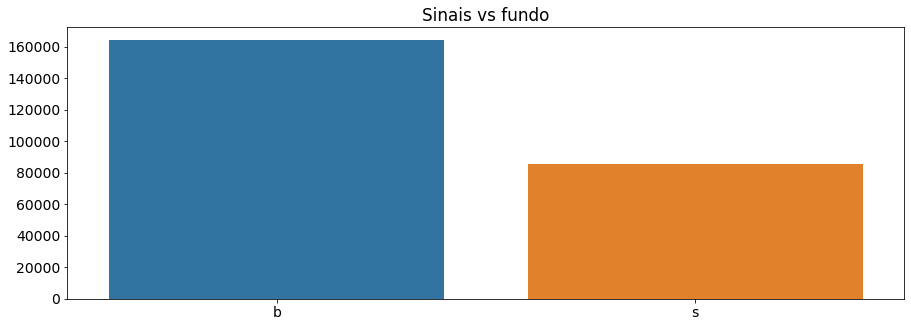

In [62]:
print(dados['Label'].value_counts())

rcParams['figure.figsize'] = 15,5
sb.barplot(x = dados['Label'].value_counts().index, y = dados['Label'].value_counts().values)
plt.title('Sinais vs fundo')
plt.show()

Vemos, nesse gráfico, a proporção entre sinais de fundo (b) e sinais de Higgs (s). Nota-se que tem muito mais sinais de fundo (65,7%) do que sinais de bóson (34,3%).

## Descrição geral dos dados 


In [63]:
dados.describe()

EventId   DER_mass_MMC  DER_mass_transverse_met_lep  \
count  250000.000000  250000.000000                250000.000000   
mean   224999.500000     -49.023079                    49.239819   
std     72168.927986     406.345647                    35.344886   
min    100000.000000    -999.000000                     0.000000   
25%    162499.750000      78.100750                    19.241000   
50%    224999.500000     105.012000                    46.524000   
75%    287499.250000     130.606250                    73.598000   
max    349999.000000    1192.026000                   690.075000   

        DER_mass_vis       DER_pt_h  DER_deltaeta_jet_jet  DER_mass_jet_jet  \
count  250000.000000  250000.000000         250000.000000     250000.000000   
mean       81.181982      57.895962           -708.420675       -601.237051   
std        40.828691      63.655682            454.480565        657.972302   
min         6.329000       0.000000           -999.000000       -999.000000   
25%        59.388750      14.068750           -999.000000       -999.000000   
50%        73.752000      38.467500           -999.000000       -999.000000   
75%        92.259000      79.169000              0.490000         83.446000   
max      1349.351000    2834.999000              8.503000       4974.979000   

       DER_prodeta_jet_jet  DER_deltar_tau_lep     DER_pt_tot  ...  \
count        250000.000000       250000.000000  250000.000000  ...   
mean           -709.356603            2.373100      18.917332  ...   
std             453.019877            0.782911      22.273494  ...   
min            -999.000000            0.208000       0.000000  ...   
25%            -999.000000            1.810000       2.841000  ...   
50%            -999.000000            2.491500      12.315500  ...   
75%              -4.593000            2.961000      27.591000  ...   
max              16.690000            5.684000    2834.999000  ...   

       PRI_met_sumet    PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  \
count  250000.000000  250000.000000       250000.000000        250000.000000   
mean      209.797178       0.979176         -348.329567          -399.254314   
std       126.499506       0.977426          532.962789           489.338286   
min        13.678000       0.000000         -999.000000          -999.000000   
25%       123.017500       0.000000         -999.000000          -999.000000   
50%       179.739000       1.000000           38.960000            -1.872000   
75%       263.379250       2.000000           75.349000             0.433000   
max      2003.976000       3.000000         1120.573000             4.499000   

       PRI_jet_leading_phi  PRI_jet_subleading_pt  PRI_jet_subleading_eta  \
count        250000.000000          250000.000000           250000.000000   
mean           -399.259788            -692.381204             -709.121609   
std             489.333883             479.875496              453.384624   
min            -999.000000            -999.000000             -999.000000   
25%            -999.000000            -999.000000             -999.000000   
50%              -2.093000            -999.000000             -999.000000   
75%               0.503000              33.703000               -2.457000   
max               3.141000             721.456000                4.500000   

       PRI_jet_subleading_phi  PRI_jet_all_pt         Weight  
count           250000.000000   250000.000000  250000.000000  
mean              -709.118631       73.064591       1.646767  
std                453.389017       98.015662       1.875103  
min               -999.000000        0.000000       0.001502  
25%               -999.000000        0.000000       0.018636  
50%               -999.000000       40.512500       1.156188  
75%                 -2.275000      109.933750       2.404128  
max                  3.142000     1633.433000       7.822543  

[8 rows x 32 columns]

# Pré-processamento dos dados

Aqui será feito as proposições anteriores (1, 2, 3 e 4) para se lidar com os valores -999.00, assim como codificar o rótulo dos sinais em números (onde 1 significa um sinal de bóson e 0 significa um sinal de fundo) e realizar uma padronização nos dados, a fim de torna-los mais adequados para comparação entre variáveis de diferentes ordens de grandeza e estabilização de alguns modelos utilizados.

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dados['Label_numerica'] = le.fit_transform(dados['Label'])
dados_analise['Label_numerica'] = le.fit_transform(dados['Label'])

# Utilizaremos 'alvo' na hora da padronização
alvo = pd.DataFrame()
alvo['Label_numerica'] = dados['Label_numerica']


In [25]:
# Proposição 1 - zerar
dados_zero = dados.replace(-999.000,0.0)
dados_zero = dados_zero.drop(columns=['Label','EventId', 'Weight'])
dados_zero.head(5)

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0       138.470                       51.655        97.827    27.980   
1       160.937                       68.768       103.235    48.146   
2         0.000                      162.172       125.953    35.635   
3       143.905                       81.417        80.943     0.414   
4       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1                  0.00             0.000                0.000   
2                  0.00             0.000                0.000   
3                  0.00             0.000                0.000   
4                  0.00             0.000                0.000   

   DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  ...  PRI_met_sumet  \
0               3.064      41.928     197.760  ...        258.733   
1               3.473       2.078     125.157  ...        164.546   
2               3.148       9.336     197.814  ...        260.414   
3               3.310       0.414      75.968  ...         86.062   
4               3.891      16.405      57.983  ...         53.131   

   PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  PRI_jet_leading_phi  \
0            2              67.435                2.150                0.444   
1            1              46.226                0.725                1.158   
2            1              44.251                2.053               -2.028   
3            0               0.000                0.000                0.000   
4            0               0.000                0.000                0.000   

   PRI_jet_subleading_pt  PRI_jet_subleading_eta  PRI_jet_subleading_phi  \
0                 46.062                    1.24                  -2.475   
1                  0.000                    0.00                   0.000   
2                  0.000                    0.00                   0.000   
3                  0.000                    0.00                   0.000   
4                  0.000                    0.00                   0.000   

   PRI_jet_all_pt  Label_numerica  
0         113.497               1  
1          46.226               0  
2          44.251               0  
3          -0.000               0  
4           0.000               0  

[5 rows x 31 columns]

In [84]:
# Proposição 2 - KNNInputer
dados_KNNInputer = dados.drop(columns=['EventId', 'Weight','Label'])
dados_KNNInputer = dados_KNNInputer.replace(-999.000,np.NaN)

# define os imputers
imputer = KNNImputer(n_neighbors=9, weights='uniform', metric='nan_euclidean')

imputer.fit(dados_KNNInputer)

KNNImputer(n_neighbors=9)

In [85]:
dados_KNNInputer = imputer.transform(dados_KNNInputer)

In [26]:
# Proposição 3 - Remover dados com alta porcentagem de registros faltantes
dados_remover = pd.DataFrame()
dados_remover = dados_analise.drop(columns=colunas_muitos_dados_faltantes)
dados_remover = dados_analise.drop(columns='Label')
dados_remover = dados_remover.replace(np.nan,-999.000)

dados_remover.head(5)

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0       138.470                       51.655        97.827    27.980   
1       160.937                       68.768       103.235    48.146   
2      -999.000                      162.172       125.953    35.635   
3       143.905                       81.417        80.943     0.414   
4       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1               -999.00          -999.000             -999.000   
2               -999.00          -999.000             -999.000   
3               -999.00          -999.000             -999.000   
4               -999.00          -999.000             -999.000   

   DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  ...  PRI_met_sumet  \
0               3.064      41.928     197.760  ...        258.733   
1               3.473       2.078     125.157  ...        164.546   
2               3.148       9.336     197.814  ...        260.414   
3               3.310       0.414      75.968  ...         86.062   
4               3.891      16.405      57.983  ...         53.131   

   PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  PRI_jet_leading_phi  \
0            2              67.435                2.150                0.444   
1            1              46.226                0.725                1.158   
2            1              44.251                2.053               -2.028   
3            0            -999.000             -999.000             -999.000   
4            0            -999.000             -999.000             -999.000   

   PRI_jet_subleading_pt  PRI_jet_subleading_eta  PRI_jet_subleading_phi  \
0                 46.062                    1.24                  -2.475   
1               -999.000                 -999.00                -999.000   
2               -999.000                 -999.00                -999.000   
3               -999.000                 -999.00                -999.000   
4               -999.000                 -999.00                -999.000   

   PRI_jet_all_pt  Label_numerica  
0         113.497               1  
1          46.226               0  
2          44.251               0  
3          -0.000               0  
4           0.000               0  

[5 rows x 31 columns]

In [27]:
dados_iguais = dados.drop(columns=['EventId', 'Weight','Label'])

dados_iguais.head()

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0       138.470                       51.655        97.827    27.980   
1       160.937                       68.768       103.235    48.146   
2      -999.000                      162.172       125.953    35.635   
3       143.905                       81.417        80.943     0.414   
4       175.864                       16.915       134.805    16.405   

   DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                  0.91           124.711                2.666   
1               -999.00          -999.000             -999.000   
2               -999.00          -999.000             -999.000   
3               -999.00          -999.000             -999.000   
4               -999.00          -999.000             -999.000   

   DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  ...  PRI_met_sumet  \
0               3.064      41.928     197.760  ...        258.733   
1               3.473       2.078     125.157  ...        164.546   
2               3.148       9.336     197.814  ...        260.414   
3               3.310       0.414      75.968  ...         86.062   
4               3.891      16.405      57.983  ...         53.131   

   PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  PRI_jet_leading_phi  \
0            2              67.435                2.150                0.444   
1            1              46.226                0.725                1.158   
2            1              44.251                2.053               -2.028   
3            0            -999.000             -999.000             -999.000   
4            0            -999.000             -999.000             -999.000   

   PRI_jet_subleading_pt  PRI_jet_subleading_eta  PRI_jet_subleading_phi  \
0                 46.062                    1.24                  -2.475   
1               -999.000                 -999.00                -999.000   
2               -999.000                 -999.00                -999.000   
3               -999.000                 -999.00                -999.000   
4               -999.000                 -999.00                -999.000   

   PRI_jet_all_pt  Label_numerica  
0         113.497               1  
1          46.226               0  
2          44.251               0  
3          -0.000               0  
4           0.000               0  

[5 rows x 31 columns]

In [10]:
def padroniza(df):
    padronizado = pd.DataFrame()  
    padronizado=(df-df.mean())/df.std()
    
    return padronizado

In [28]:
#dados = [dados_zero, dados_remover, dados_iguais]
#, dados_KNNInputer1, dados_KNNInputer2, dados_KNNInputer3, dados_KNNInputer4, dados_KNNInputer5, dados_KNNInputer6
#        dados_KNNInputer7, dados_KNNInputer8, dados_KNNInputer9, dados_KNNInputer10

#for dado in dados:
#    dado = padroniza(dado)
#    dado['Label_numerica'] = alvo['Label_numerica']
    

dados_zero = (dados_zero-dados_zero.mean())/dados_zero.std()
dados_remover = (dados_remover-dados_remover.mean())/dados_remover.std()
dados_iguais = (dados_iguais-dados_iguais.mean())/dados_iguais.std()

dados_zero['Label_numerica'] = alvo['Label_numerica']
dados_remover['Label_numerica'] = alvo['Label_numerica']
dados_iguais['Label_numerica'] = alvo['Label_numerica']

'''
dados_KNNInputer1 = padroniza(dados_KNNInputer1)
dados_KNNInputer2 = padroniza(dados_KNNInputer2)
dados_KNNInputer3 = padroniza(dados_KNNInputer3)
dados_KNNInputer4 = padroniza(dados_KNNInputer4)
dados_KNNInputer5 = padroniza(dados_KNNInputer5)
dados_KNNInputer6 = padroniza(dados_KNNInputer6)
dados_KNNInputer7 = padroniza(dados_KNNInputer7)
dados_KNNInputer8 = padroniza(dados_KNNInputer8)
dados_KNNInputer9 = padroniza(dados_KNNInputer9)
dados_KNNInputer10 = padroniza(dados_KNNInputer10)

dados_zero['Label_numerica'] = alvo['Label_numerica']
dados_zero['Label_numerica'] = alvo['Label_numerica']
dados_zero['Label_numerica'] = alvo['Label_numerica']
dados_zero['Label_numerica'] = alvo['Label_numerica']
dados_zero['Label_numerica'] = alvo['Label_numerica']
dados_zero['Label_numerica'] = alvo['Label_numerica']
dados_zero['Label_numerica'] = alvo['Label_numerica']
dados_zero['Label_numerica'] = alvo['Label_numerica']
dados_zero['Label_numerica'] = alvo['Label_numerica']
'''



"\ndados_KNNInputer1 = padroniza(dados_KNNInputer1)\ndados_KNNInputer2 = padroniza(dados_KNNInputer2)\ndados_KNNInputer3 = padroniza(dados_KNNInputer3)\ndados_KNNInputer4 = padroniza(dados_KNNInputer4)\ndados_KNNInputer5 = padroniza(dados_KNNInputer5)\ndados_KNNInputer6 = padroniza(dados_KNNInputer6)\ndados_KNNInputer7 = padroniza(dados_KNNInputer7)\ndados_KNNInputer8 = padroniza(dados_KNNInputer8)\ndados_KNNInputer9 = padroniza(dados_KNNInputer9)\ndados_KNNInputer10 = padroniza(dados_KNNInputer10)\n\n\n\n\n\n\ndados_zero['Label_numerica'] = alvo['Label_numerica']\ndados_zero['Label_numerica'] = alvo['Label_numerica']\ndados_zero['Label_numerica'] = alvo['Label_numerica']\ndados_zero['Label_numerica'] = alvo['Label_numerica']\ndados_zero['Label_numerica'] = alvo['Label_numerica']\ndados_zero['Label_numerica'] = alvo['Label_numerica']\ndados_zero['Label_numerica'] = alvo['Label_numerica']\ndados_zero['Label_numerica'] = alvo['Label_numerica']\ndados_zero['Label_numerica'] = alvo['Label_

In [29]:
dados_iguais

DER_mass_MMC  DER_mass_transverse_met_lep  DER_mass_vis  DER_pt_h  \
0           0.461413                     0.068332      0.407679 -0.469965   
1           0.516703                     0.552504      0.540135 -0.153167   
2          -2.337854                     3.195149      1.096558 -0.349709   
3           0.474788                     0.910377     -0.005853 -0.903014   
4           0.553438                    -0.914554      1.313366 -0.651803   
...              ...                          ...           ...       ...   
249995     -2.337854                     0.643634     -1.093201 -0.830310   
249996     -2.337854                     0.252913     -0.320828 -0.557012   
249997      0.380169                     0.319316     -0.130863 -0.284954   
249998      0.354314                    -0.845322     -0.302973 -0.697376   
249999     -2.337854                     0.665335     -0.253522 -0.792026   

        DER_deltaeta_jet_jet  DER_mass_jet_jet  DER_prodeta_jet_jet  \
0                   1.560750          1.103311             1.571725   
1                  -0.639366         -0.604528            -0.639361   
2                  -0.639366         -0.604528            -0.639361   
3                  -0.639366         -0.604528            -0.639361   
4                  -0.639366         -0.604528            -0.639361   
...                      ...               ...                  ...   
249995             -0.639366         -0.604528            -0.639361   
249996             -0.639366         -0.604528            -0.639361   
249997             -0.639366         -0.604528            -0.639361   
249998             -0.639366         -0.604528            -0.639361   
249999             -0.639366         -0.604528            -0.639361   

        DER_deltar_tau_lep  DER_pt_tot  DER_sum_pt  ...  PRI_met_sumet  \
0                 0.882476    1.033096    0.339894  ...       0.386846   
1                 1.404885   -0.756026   -0.287584  ...      -0.357718   
2                 0.989768   -0.430167    0.340360  ...       0.400135   
3                 1.196688   -0.830733   -0.712704  ...      -0.978148   
4                 1.938790   -0.112795   -0.868141  ...      -1.238473   
...                    ...         ...         ...  ...            ...   
249995           -1.253143   -0.622953   -0.886213  ...      -0.514881   
249996            0.270657    0.158110   -0.931794  ...      -1.022843   
249997            0.021586    0.146617   -0.328161  ...      -0.086089   
249998            1.266938   -0.243039   -0.886498  ...      -0.767427   
249999           -0.444622   -0.513540   -0.649855  ...      -0.872669   

        PRI_jet_num  PRI_jet_leading_pt  PRI_jet_leading_eta  \
0          1.044400            0.780101             0.820300   
1          0.021305            0.740306             0.817388   
2          0.021305            0.736600             0.820102   
3         -1.001790           -1.220855            -1.225626   
4         -1.001790           -1.220855            -1.225626   
...             ...                 ...                  ...   
249995    -1.001790           -1.220855            -1.225626   
249996    -1.001790           -1.220855            -1.225626   
249997     0.021305            0.732362             0.819585   
249998    -1.001790           -1.220855            -1.225626   
249999    -1.001790           -1.220855            -1.225626   

        PRI_jet_leading_phi  PRI_jet_subleading_pt  PRI_jet_subleading_eta  \
0                  0.816832               1.538822                1.566797   
1                  0.818292              -0.638955               -0.639365   
2                  0.811781              -0.638955               -0.639365   
3                 -1.225626              -0.638955               -0.639365   
4                 -1.225626              -0.638955               -0.639365   
...                     ...                    ...                     ...   
249995            -1.22562

## Correlações
 Vemos alta correlação entre os seguintes grupos de variáveis:
- DER_deltaeta_jet_jet, DER_prodeta_jet_jet, DER_mass_jet_jet, DER_lep_eta_centrality, PRI_jet_subleading_pt, PRI_jet_subleading_eta, PRI_jet_subleading_phi
- DER_sum_pt, PRI_jet_all_pt, PRI_met_sumet
- PRI_jet_leading_pt, PRI_jet_leading_phi, PRI_jet_leading_ETA

<AxesSubplot:>

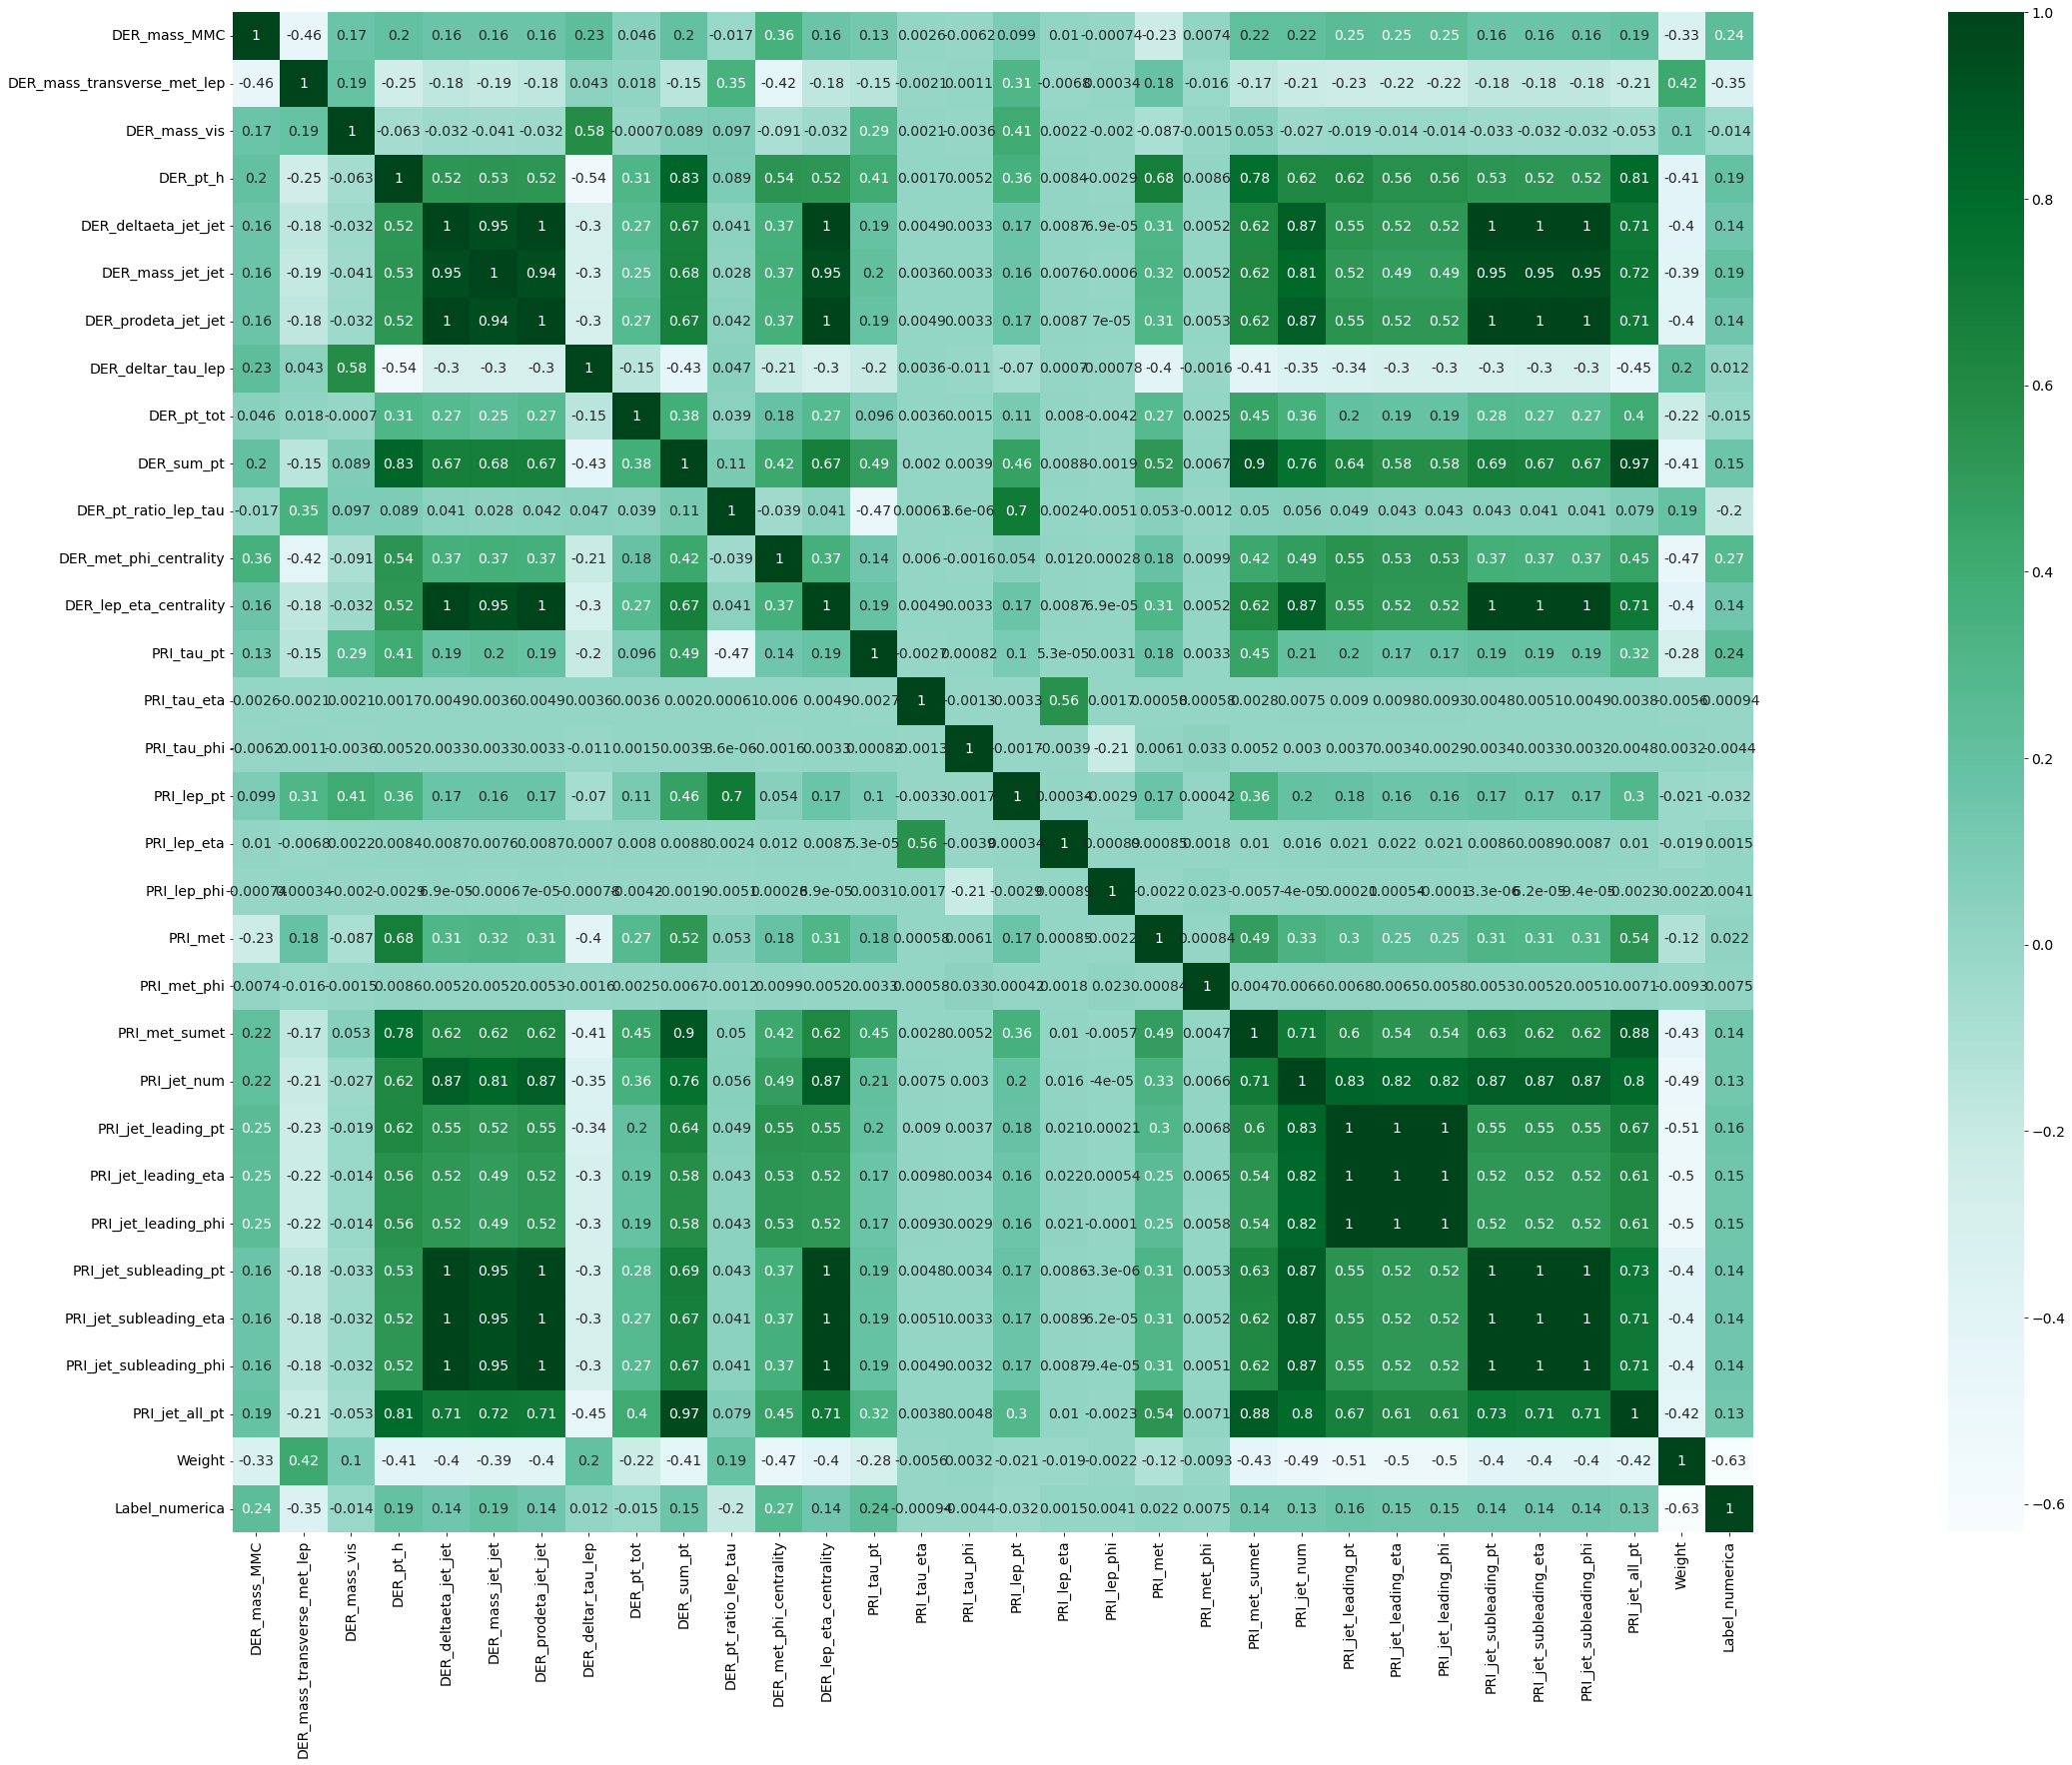

In [30]:
plt.figure(figsize=(70,28))
sb.heatmap(dados.drop(['EventId'], axis=1).corr(),annot=True, square=True,cmap="BuGn")

## Scatterplot de variáveis relacionadas
Aqui foi feito um scatterplot com algumas variáveis relacionadas utilizando os dados em que -999 foi imputado com 0, pois caso outros dados fossem usados teríamos o caso do primeiro gráfico, onde não é possível ver a distribuição devido aos outliers -999.00.

Pela análise não foi possível concluir muito, somente que existem sim padrões de distribuição dos sinais de fundo e de bósons, mesmo que haja muita dispersão e variância entre as observações.

<AxesSubplot:xlabel='DER_deltaeta_jet_jet', ylabel='PRI_jet_subleading_phi'>

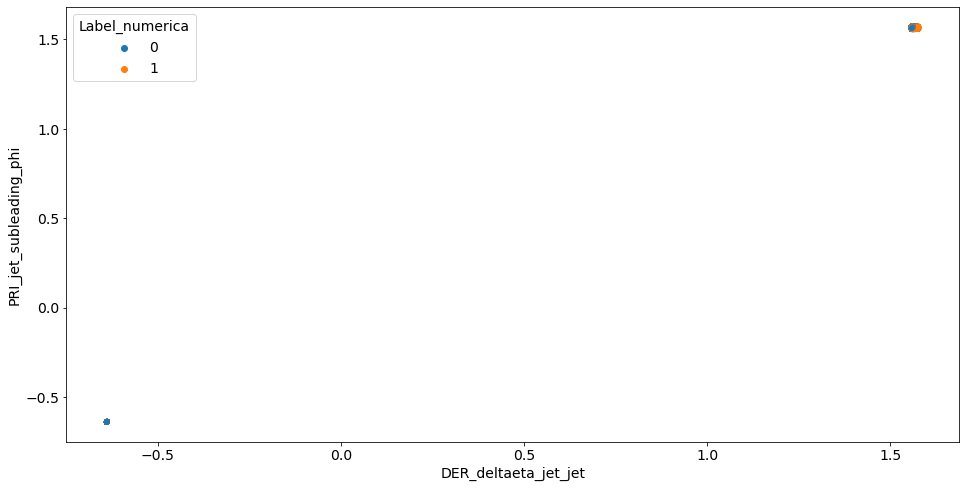

In [35]:
sb.scatterplot(x='DER_deltaeta_jet_jet', y='PRI_jet_subleading_phi', data=dados_remover, hue='Label_numerica', ec=None)

<AxesSubplot:xlabel='DER_deltaeta_jet_jet', ylabel='PRI_jet_subleading_eta'>

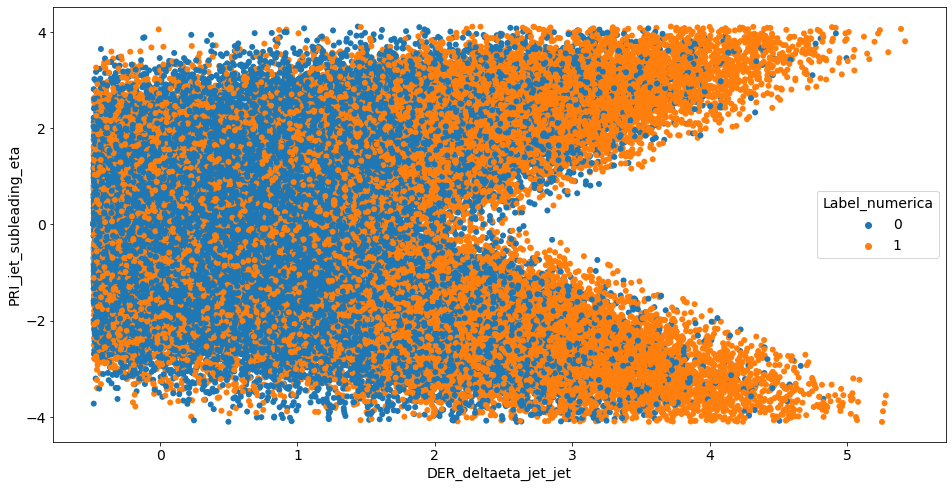

In [38]:
sb.scatterplot(x='DER_deltaeta_jet_jet', y='PRI_jet_subleading_eta',  data=dados_zero, hue='Label_numerica', ec=None)

<AxesSubplot:xlabel='DER_deltaeta_jet_jet', ylabel='PRI_jet_subleading_pt'>

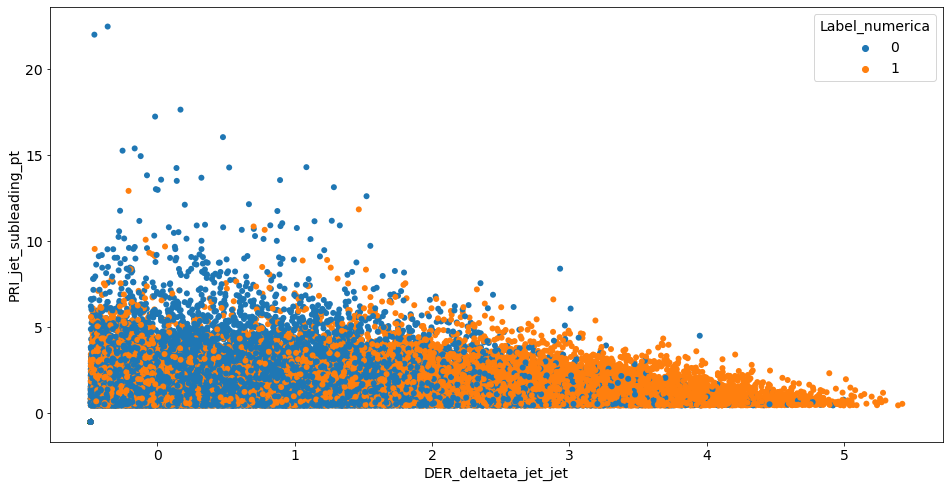

In [39]:
sb.scatterplot(x='DER_deltaeta_jet_jet', y='PRI_jet_subleading_pt', data=dados_zero, hue='Label_numerica', ec=None)

<AxesSubplot:xlabel='DER_deltaeta_jet_jet', ylabel='DER_lep_eta_centrality'>

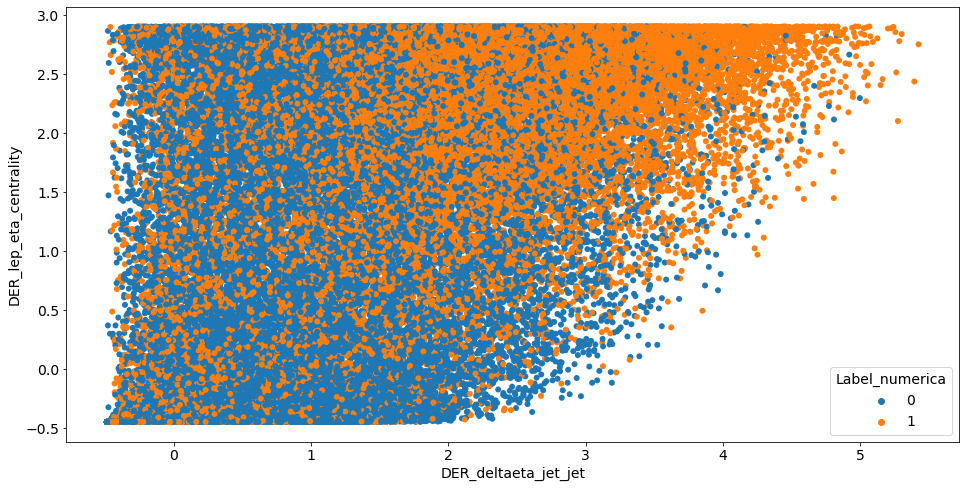

In [40]:
sb.scatterplot(x='DER_deltaeta_jet_jet', y='DER_lep_eta_centrality', data=dados_zero, hue='Label_numerica', ec=None)


<AxesSubplot:xlabel='DER_sum_pt', ylabel='PRI_jet_all_pt'>

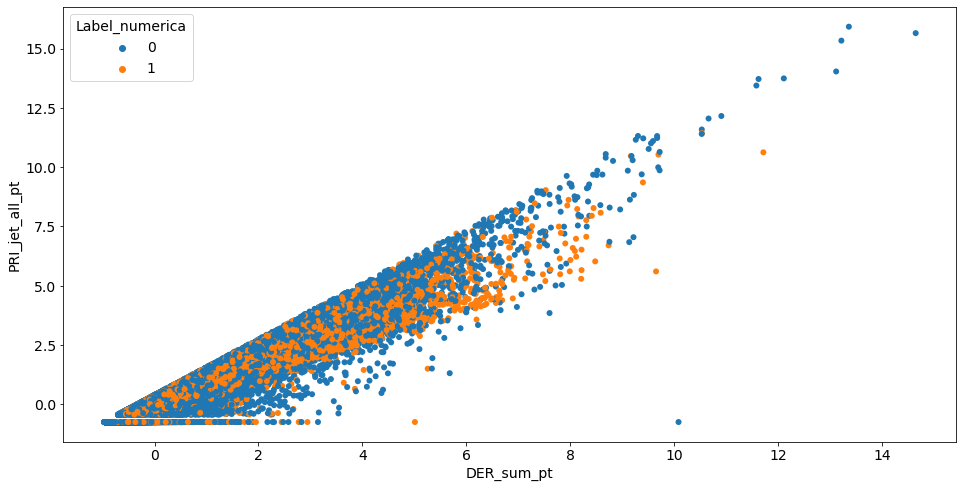

In [41]:
sb.scatterplot(x='DER_sum_pt', y='PRI_jet_all_pt', data=dados_zero, hue='Label_numerica', ec=None)


<AxesSubplot:xlabel='PRI_jet_leading_pt', ylabel='PRI_jet_leading_phi'>

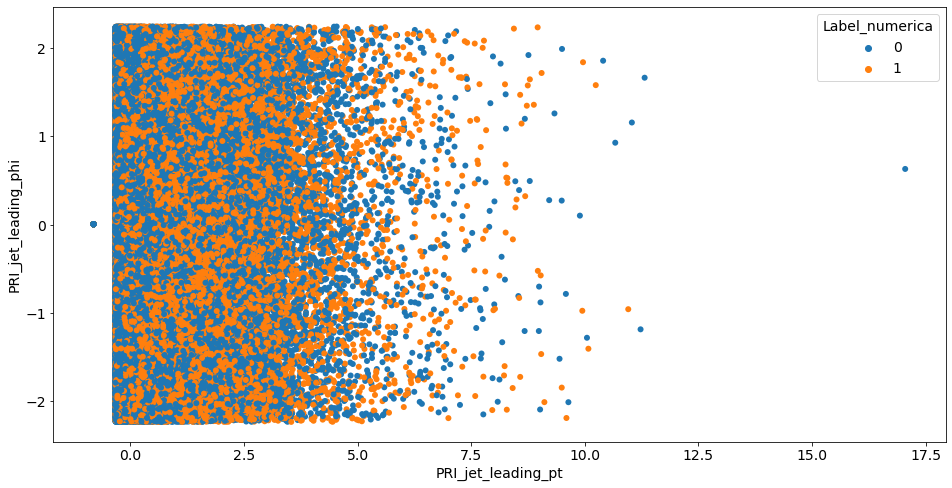

In [42]:
sb.scatterplot(x='PRI_jet_leading_pt', y='PRI_jet_leading_phi', data=dados_zero, hue='Label_numerica', ec=None)


# Análise de variáveis correlacionadas
Foi feita uma análise de correlação de variáveis abaixo, utilizando os dados originais (apenas padronizados) anteriormente. Nota-se que não temos alta correlação (>0.7) entre nenhuma das variáveis com relação ao rótulo dos sinais, porém foi selecionado as colunas com correlação maior que 0.2 para ver se havia alguma relação útil entre os dados. Também foi calculado o VIF e não houve indicação de multicolinearidade. Isso foi feito apenas para uma análise superficial e não teve nenhum uso futuro. 

In [56]:
df_corr_iguais = dados_iguais.corr()['Label_numerica'].abs().sort_values(ascending=False)
df_corr_iguais


Label_numerica                 1.000000
DER_mass_transverse_met_lep    0.351428
DER_met_phi_centrality         0.271752
DER_mass_MMC                   0.239149
PRI_tau_pt                     0.235238
DER_pt_ratio_lep_tau           0.195398
DER_pt_h                       0.192526
DER_mass_jet_jet               0.191766
PRI_jet_leading_pt             0.157604
DER_sum_pt                     0.153236
PRI_jet_leading_eta            0.150469
PRI_jet_leading_phi            0.150468
DER_deltaeta_jet_jet           0.141646
DER_lep_eta_centrality         0.141346
PRI_jet_subleading_eta         0.141265
PRI_jet_subleading_phi         0.141256
PRI_jet_subleading_pt          0.140714
DER_prodeta_jet_jet            0.140554
PRI_met_sumet                  0.135520
PRI_jet_all_pt                 0.134296
PRI_jet_num                    0.133549
PRI_lep_pt                     0.031948
PRI_met                        0.022466
DER_pt_tot                     0.015287
DER_mass_vis                   0.014055


In [66]:
features = ['DER_mass_transverse_met_lep', 'DER_met_phi_centrality', 'DER_mass_MMC', 'PRI_tau_pt']
features       

['DER_mass_transverse_met_lep',
 'DER_met_phi_centrality',
 'DER_mass_MMC',
 'PRI_tau_pt']

In [67]:
from sklearn.linear_model import LinearRegression

def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    for feature in features:
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        tolerance[feature] = 1 - r2
        vif[feature] = 1/(tolerance[feature])
    return pd.DataFrame({'VIF': vif, 'Tolerância': tolerance})
calculate_vif(dados_iguais,features)

VIF  Tolerância
DER_mass_transverse_met_lep  1.401527    0.713508
DER_met_phi_centrality       1.275758    0.783847
DER_mass_MMC                 1.323278    0.755699
PRI_tau_pt                   1.033117    0.967944

# Análise de componentes principais

Cumulative Variances (Percentage):
[ 40.89089046  48.78682085  56.51147905  63.11034628  68.66110491
  73.84377414  77.86761614  81.61725119  84.97238699  87.98729431
  90.60515434  92.78201899  94.37952201  95.85544215  97.17417806
  98.14710612  98.65415253  99.04865342  99.36524819  99.66500056
  99.87818989  99.9970375   99.99946374  99.99992384  99.99994986
  99.99997269  99.99998905  99.99999906 100.         100.        ]



Text(0, 0.5, 'Variância explicada (%)')

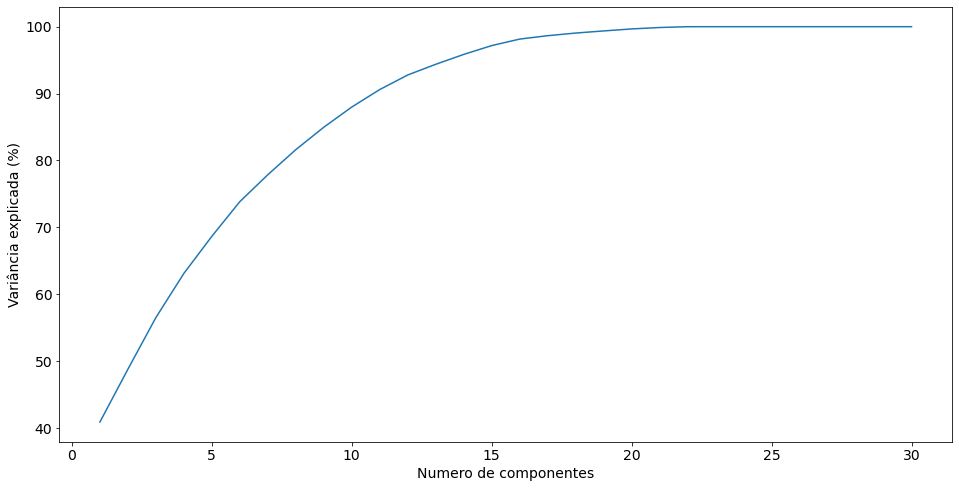

In [72]:
X_iguais = dados_iguais.drop(columns=['Label_numerica'])
X_zero = dados_zero.drop(columns=['Label_numerica'])
X_remover = dados_remover.drop(columns=['Label_numerica'])

from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)
pca.fit(X_iguais)

print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

# scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Numero de componentes")
plt.ylabel("Variância explicada (%)")



Cumulative Variances (Percentage):
[ 27.58581936  36.04198258  43.73690884  50.29634074  55.80312253
  60.2594189   64.42629777  68.42532658  72.24172974  75.65558192
  79.0093231   81.94326721  84.47769909  86.99025001  89.15338708
  91.01961182  92.71088337  94.18609388  95.39002485  96.29050388
  97.07175472  97.78248904  98.29910666  98.77425986  99.20268323
  99.51716418  99.73618092  99.93693898 100.         100.        ]



Text(0, 0.5, 'Variância explicada (%)')

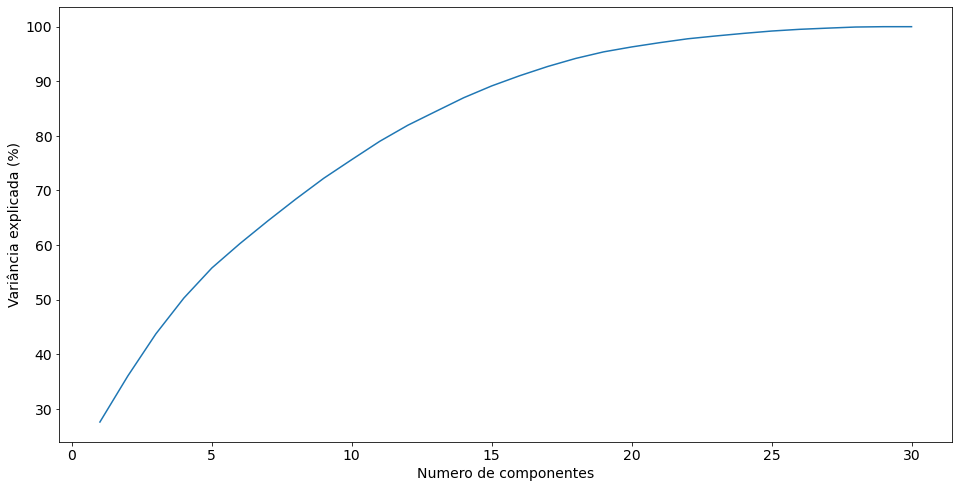

In [73]:

pca = PCA(n_components = components)
pca.fit(X_zero)

print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

# scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Numero de componentes")
plt.ylabel("Variância explicada (%)")

Cumulative Variances (Percentage):
[ 40.89089046  48.78682085  56.51147905  63.11034628  68.66110491
  73.84377414  77.86761614  81.61725119  84.97238699  87.98729431
  90.60515434  92.78201899  94.37952201  95.85544215  97.17417806
  98.14710612  98.65415253  99.04865342  99.36524819  99.66500056
  99.87818989  99.9970375   99.99946374  99.99992384  99.99994986
  99.99997269  99.99998905  99.99999906 100.         100.        ]



Text(0, 0.5, 'Variância explicada (%)')

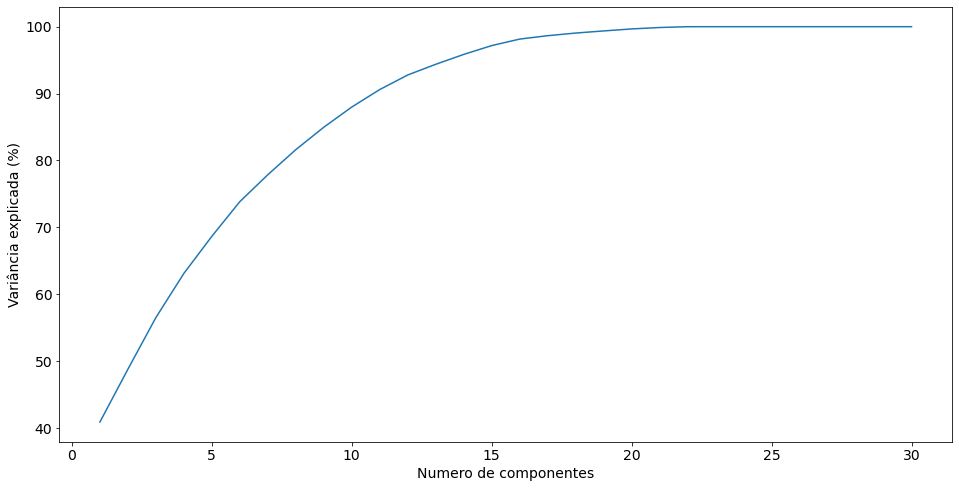

In [74]:
pca = PCA(n_components = components)
pca.fit(X_remover)

print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

# scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Numero de componentes")
plt.ylabel("Variância explicada (%)")

A partir dessa análise vemos que, para atingir um mínimo de 80% de variância dos dados com colunas removidas e dados inalterados precisamos de 8 componentes, ao passo que quando imputamos 0 nos valores faltantes precisamos de 12 componentes.

# Divisão em base de teste e treino

A divisão foi feita via train_test_split, com proporção de 30/70 % de base teste/treino. Também foi feita uma análise de KNN para ver qual o número de vizinhos é mais adequada. Esse número, inclusive, foi o utilizado na imputação realizada na preparação  dos dados.

In [86]:
# Variável predita
y_iguais = dados_iguais['Label_numerica']
y_zero = dados_zero['Label_numerica']
y_remover = dados_remover['Label_numerica']

# Variáveis preditoras 
X_iguais = dados_iguais.drop(columns=['Label_numerica'])
X_zero = dados_zero.drop(columns=['Label_numerica'])
X_remover = dados_remover.drop(columns=['Label_numerica'])

X_treino_i,X_teste_i,y_treino_i,y_teste_i = train_test_split(X_iguais,y_iguais,random_state = 10,test_size=0.3,shuffle =True)
X_treino_z,X_teste_z,y_treino_z,y_teste_z = train_test_split(X_zero,y_zero,random_state = 10,test_size=0.3,shuffle =True)
X_treino_r,X_teste_r,y_treino_r,y_teste_r = train_test_split(X_remover,y_remover,random_state = 10,test_size=0.3,shuffle =True)

In [77]:
test_scores = []
train_scores = []

for i in range(1,10):
    knn = KNeighborsClassifier(i)
    knn.fit(X_treino_i,y_treino_i)
    
    train_scores.append(knn.score(X_treino_i,y_treino_i))
    test_scores.append(knn.score(X_teste_i,y_teste_i))
    print(i)

1
2
3
4
5
6
7
8
9


In [78]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Score de teste máximo {} %, sendo k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Score de teste máximo 79.12400000000001 %, sendo k = [9]


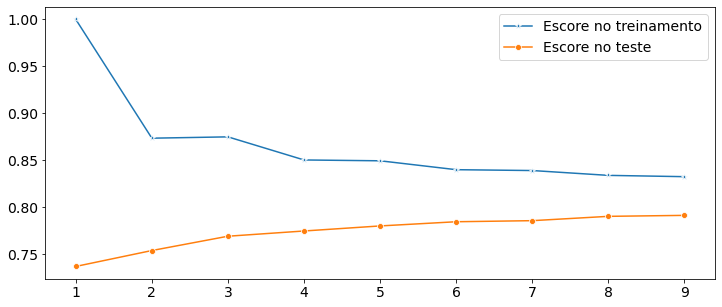

In [83]:
plt.figure(figsize=(12,5))
p = sb.lineplot(x=range(1,10),y=train_scores,marker='*',label='Escore no treinamento')
p = sb.lineplot(x=range(1,10),y=test_scores,marker='o',label='Escore no teste')

# Fitting de modelos

In [101]:
dados_KNNImputer = pd.DataFrame(dados_KNNInputer, columns=['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 
                                                            'DER_pt_h','DER_deltaeta_jet_jet','DER_mass_jet_jet', 
                                                            'DER_prodeta_jet_jet','DER_deltar_tau_lep','DER_pt_tot'
                                                           , 'DER_sum_pt', 'DER_pt_ratio_lep_tau','DER_met_phi_centrality',
                                                            'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi'
                                                           , 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi'
                                                           , 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
                                                           'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt'
                                                           , 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
                                                           'Label_numerica']) 


In [102]:
# Fitting separado do KNNImputer
y_knn = dados_KNNImputer['Label_numerica']

# Variáveis preditoras 
X_knn = dados_KNNImputer.drop(columns=['Label_numerica'])

X_treino_k,X_teste_k,y_treino_k,y_teste_k = train_test_split(X_knn,y_knn,random_state = 10,test_size=0.3,shuffle =True)

In [103]:
regressao_log_k= LogisticRegression()
regressao_log_k.fit(X_treino_k,y_treino_k)

random_forest_k = RandomForestClassifier()
random_forest_k.fit(X_treino_k,y_treino_k)

arv_decisao_entropia_k = DecisionTreeClassifier(criterion= 'entropy',max_depth = None, 
                                           splitter='best', random_state=10)
arv_decisao_entropia_k.fit(X_treino_k,y_treino_k)

arv_decisao_gini_k = DecisionTreeClassifier(criterion= 'gini',max_depth = None, splitter='best', random_state=10)
arv_decisao_gini_k.fit(X_treino_k,y_treino_k)

gbm_k = GradientBoostingClassifier(loss = 'deviance', learning_rate = 0.01, n_estimators = 100, max_depth = 30, random_state=10)
gbm_k.fit(X_treino_k,y_treino_k)

KNN_k = KNeighborsClassifier(n_neighbors = 9, weights = 'distance', algorithm = 'brute')
KNN_k.fit(X_treino_k,y_treino_k)

SVCLinear_k = SVC(kernel= 'linear', degree=3, max_iter=10000, C=2, random_state = 55)
SVCLinear_k.fit(X_treino_k,y_treino_k)

bernoulliNB_k = BernoulliNB(alpha=0.1)
bernoulliNB_k.fit(X_treino_k,y_treino_k)

C:\Users\Victor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Victor\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


BernoulliNB(alpha=0.1)

In [87]:
regressao_log_i= LogisticRegression()
regressao_log_i.fit(X_treino_i,y_treino_i)
y_pred_i=regressao_log_i.predict(X_teste_i)

regressao_log_z= LogisticRegression()
regressao_log_z.fit(X_treino_z,y_treino_z)
y_pred_z=regressao_log_z.predict(X_teste_z)

regressao_log_r= LogisticRegression()
regressao_log_r.fit(X_treino_r,y_treino_r)
y_pred_r=regressao_log_r.predict(X_teste_r)

C:\Users\Victor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Victor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [88]:
random_forest_i = RandomForestClassifier()
random_forest_z = RandomForestClassifier()
random_forest_r = RandomForestClassifier()

random_forest_i.fit(X_treino_i,y_treino_i)
random_forest_z.fit(X_treino_z,y_treino_z)
random_forest_r.fit(X_treino_r,y_treino_r)

RandomForestClassifier()

In [89]:
arv_decisao_entropia_i = DecisionTreeClassifier(criterion= 'entropy',max_depth = None, 
                                           splitter='best', 
                                           random_state=10)
arv_decisao_entropia_z = DecisionTreeClassifier(criterion= 'entropy',max_depth = None, 
                                           splitter='best', 
                                           random_state=10)
arv_decisao_entropia_r = DecisionTreeClassifier(criterion= 'entropy',max_depth = None, 
                                           splitter='best', 
                                           random_state=10)

arv_decisao_entropia_i.fit(X_treino_i,y_treino_i)
arv_decisao_entropia_z.fit(X_treino_z,y_treino_z)
arv_decisao_entropia_r.fit(X_treino_r,y_treino_r)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [90]:
arv_decisao_gini_i = DecisionTreeClassifier(criterion= 'gini',max_depth = None, 
                                           splitter='best', 
                                           random_state=10)
arv_decisao_gini_z = DecisionTreeClassifier(criterion= 'gini',max_depth = None, 
                                           splitter='best', 
                                           random_state=10)
arv_decisao_gini_r = DecisionTreeClassifier(criterion= 'gini',max_depth = None, 
                                           splitter='best', 
                                           random_state=10)

arv_decisao_gini_i.fit(X_treino_i,y_treino_i)
arv_decisao_gini_z.fit(X_treino_z,y_treino_z)
arv_decisao_gini_r.fit(X_treino_r,y_treino_r)

DecisionTreeClassifier(random_state=10)

In [91]:
gbm_i = GradientBoostingClassifier(loss = 'deviance', learning_rate = 0.01, n_estimators = 100, max_depth = 30, random_state=10)
gbm_z = GradientBoostingClassifier(loss = 'deviance', learning_rate = 0.01, n_estimators = 100, max_depth = 30, random_state=10)
gbm_r = GradientBoostingClassifier(loss = 'deviance', learning_rate = 0.01, n_estimators = 100, max_depth = 30, random_state=10)

gbm_i.fit(X_treino_i,y_treino_i)
gbm_z.fit(X_treino_z,y_treino_z)
gbm_r.fit(X_treino_r,y_treino_r)

GradientBoostingClassifier(learning_rate=0.01, max_depth=30, random_state=10)

In [92]:
KNN_i = KNeighborsClassifier(n_neighbors = 9, weights = 'distance', algorithm = 'brute')
KNN_z = KNeighborsClassifier(n_neighbors = 9, weights = 'distance', algorithm = 'brute')
KNN_r = KNeighborsClassifier(n_neighbors = 9, weights = 'distance', algorithm = 'brute')

KNN_i.fit(X_treino_i,y_treino_i)
KNN_z.fit(X_treino_z,y_treino_z)
KNN_r.fit(X_treino_r,y_treino_r)

KNeighborsClassifier(algorithm='brute', n_neighbors=6, weights='distance')

In [93]:
SVCLinear_i = SVC(kernel= 'linear', degree=3, max_iter=10000, C=2, random_state = 55)
SVCLinear_z = SVC(kernel= 'linear', degree=3, max_iter=10000, C=2, random_state = 55)
SVCLinear_r = SVC(kernel= 'linear', degree=3, max_iter=10000, C=2, random_state = 55)

SVCLinear_i.fit(X_treino_i,y_treino_i)
SVCLinear_z.fit(X_treino_z,y_treino_z)
SVCLinear_r.fit(X_treino_r,y_treino_r)

C:\Users\Victor\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Victor\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'
C:\Users\Victor\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(C=2, kernel='linear', max_iter=10000, random_state=55)

In [95]:
bernoulliNB_i = BernoulliNB(alpha=0.1)
bernoulliNB_z = BernoulliNB(alpha=0.1)
bernoulliNB_r = BernoulliNB(alpha=0.1)

bernoulliNB_i.fit(X_treino_i,y_treino_i)
bernoulliNB_z.fit(X_treino_z,y_treino_z)
bernoulliNB_r.fit(X_treino_r,y_treino_r)

BernoulliNB(alpha=0.1)

# Classificação dos modelos

Abaixo temos uma classificação dos modelos utilizados para os quatro diferentes tratamentos de dados, primeiro os dados só padronizados, depois os dados com os dados removidos, em seguida os dados com imputação por zero e por último os dados com imputação via KNN. 

Nessa classificação temos os escores de teste, treinamento, escore F1 e a matriz de confusão para todos os modelos.

In [98]:
models = [regressao_log_i, random_forest_i,arv_decisao_entropia_i, arv_decisao_gini_i, gbm_i, bernoulliNB_i, SVCLinear_i,KNN_i]

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
for model in models:
    print(type(model).__name__,' Acurácia de treino   : ' ,model.score(X_treino_i,y_treino_i))
    print(type(model).__name__,' Acurácia de teste    : ' ,model.score(X_teste_i, y_teste_i))
    
    y_pred_i = model.predict(X_teste_i)
    
    cm = confusion_matrix(y_teste_i, y_pred_i)
    print(' ')
    labels = ['Negativo', 'Positivo']  
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)

    print(df_cm)
    print(' ')
    print(type(model).__name__,' Score F1          : ' ,f1_score(y_teste_i,y_pred_i))
    print('--------------------------------------------------------------------------')

LogisticRegression  Acurácia de treino   :  0.7507542857142857
LogisticRegression  Acurácia de teste    :  0.7495466666666667
 
          Negativo  Positivo
Negativo     42591      6835
Positivo     11949     13625
 
LogisticRegression  Score F1          :  0.5919537732979971
--------------------------------------------------------------------------
RandomForestClassifier  Acurácia de treino   :  0.9999942857142857
RandomForestClassifier  Acurácia de teste    :  0.8380933333333334
 
          Negativo  Positivo
Negativo     44765      4661
Positivo      7482     18092
 
RandomForestClassifier  Score F1          :  0.7487325925466096
--------------------------------------------------------------------------
DecisionTreeClassifier  Acurácia de treino   :  1.0
DecisionTreeClassifier  Acurácia de teste    :  0.7659466666666667
 
          Negativo  Positivo
Negativo     40441      8985
Positivo      8569     17005
 
DecisionTreeClassifier  Score F1          :  0.6595686913350399
----------

In [99]:
models = [regressao_log_r, random_forest_r, arv_decisao_entropia_r, arv_decisao_gini_r, gbm_r, bernoulliNB_r, SVCLinear_r,KNN_r]

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
for model in models:
    print(type(model).__name__,' Acurácia de treino   : ' ,model.score(X_treino_r,y_treino_r))
    print(type(model).__name__,' Acurácia de teste    : ' ,model.score(X_teste_r, y_teste_r))
    
    y_pred_r = model.predict(X_teste_r)
    
    cm = confusion_matrix(y_teste_r, y_pred_r)
    print(' ')
    labels = ['Negativo', 'Positivo']  
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)

    print(df_cm)
    print(' ')
    print(type(model).__name__,' Score F1          : ' ,f1_score(y_teste_r,y_pred_r))
    print('--------------------------------------------------------------------------')

LogisticRegression  Acurácia de treino   :  0.7507542857142857
LogisticRegression  Acurácia de teste    :  0.7495466666666667
 
          Negativo  Positivo
Negativo     42591      6835
Positivo     11949     13625
 
LogisticRegression  Score F1          :  0.5919537732979971
--------------------------------------------------------------------------
RandomForestClassifier  Acurácia de treino   :  0.9999828571428572
RandomForestClassifier  Acurácia de teste    :  0.83708
 
          Negativo  Positivo
Negativo     44741      4685
Positivo      7534     18040
 
RandomForestClassifier  Score F1          :  0.7470133957224788
--------------------------------------------------------------------------
DecisionTreeClassifier  Acurácia de treino   :  1.0
DecisionTreeClassifier  Acurácia de teste    :  0.7659466666666667
 
          Negativo  Positivo
Negativo     40441      8985
Positivo      8569     17005
 
DecisionTreeClassifier  Score F1          :  0.6595686913350399
---------------------

In [100]:
models = [regressao_log_z, random_forest_z, arv_decisao_entropia_z, arv_decisao_gini_z, gbm_z, bernoulliNB_z,SVCLinear_z,KNN_z]

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
for model in models:
    print(type(model).__name__,' Acurácia de treino   : ' ,model.score(X_treino_z,y_treino_z))
    print(type(model).__name__,' Acurácia de teste    : ' ,model.score(X_teste_z, y_teste_z))
    
    y_pred_z = model.predict(X_teste_z)
    
    cm = confusion_matrix(y_teste_z, y_pred_z)
    print(' ')
    labels = ['Negativo', 'Positivo']  
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)

    print(df_cm)
    print(' ')
    print(type(model).__name__,' Score F1          : ' ,f1_score(y_teste_z,y_pred_z))
    print('--------------------------------------------------------------------------')

LogisticRegression  Acurácia de treino   :  0.7536857142857143
LogisticRegression  Acurácia de teste    :  0.7527066666666666
 
          Negativo  Positivo
Negativo     42743      6683
Positivo     11864     13710
 
LogisticRegression  Score F1          :  0.5965148911175409
--------------------------------------------------------------------------
RandomForestClassifier  Acurácia de treino   :  0.9999885714285714
RandomForestClassifier  Acurácia de teste    :  0.837
 
          Negativo  Positivo
Negativo     44718      4708
Positivo      7517     18057
 
RandomForestClassifier  Score F1          :  0.7470986160243283
--------------------------------------------------------------------------
DecisionTreeClassifier  Acurácia de treino   :  1.0
DecisionTreeClassifier  Acurácia de teste    :  0.7680133333333333
 
          Negativo  Positivo
Negativo     40573      8853
Positivo      8546     17028
 
DecisionTreeClassifier  Score F1          :  0.6618598775629191
-----------------------

In [104]:
models = [regressao_log_k, random_forest_k, arv_decisao_entropia_k, arv_decisao_gini_k, gbm_k, bernoulliNB_k,SVCLinear_k,KNN_k]

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
for model in models:
    print(type(model).__name__,' Acurácia de treino   : ' ,model.score(X_treino_k,y_treino_k))
    print(type(model).__name__,' Acurácia de teste    : ' ,model.score(X_teste_k, y_teste_k))
    
    y_pred_k = model.predict(X_teste_k)
    
    cm = confusion_matrix(y_teste_k, y_pred_k)
    print(' ')
    labels = ['Negativo', 'Positivo']  
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)

    print(df_cm)
    print(' ')
    print(type(model).__name__,' Score F1          : ' ,f1_score(y_teste_k,y_pred_k))
    print('--------------------------------------------------------------------------')

LogisticRegression  Acurácia de treino   :  0.7454914285714286
LogisticRegression  Acurácia de teste    :  0.74348
 
          Negativo  Positivo
Negativo     42458      6968
Positivo     12271     13303
 
LogisticRegression  Score F1          :  0.5803468208092485
--------------------------------------------------------------------------
RandomForestClassifier  Acurácia de treino   :  0.9999828571428572
RandomForestClassifier  Acurácia de teste    :  0.8356266666666666
 
          Negativo  Positivo
Negativo     44731      4695
Positivo      7633     17941
 
RandomForestClassifier  Score F1          :  0.7442854179630782
--------------------------------------------------------------------------
DecisionTreeClassifier  Acurácia de treino   :  1.0
DecisionTreeClassifier  Acurácia de teste    :  0.76624
 
          Negativo  Positivo
Negativo     40604      8822
Positivo      8710     16864
 
DecisionTreeClassifier  Score F1          :  0.6579789309403044
--------------------------------

# Análise dos resultados

## Regressão logística

Na análise da regressão logística foi comparado o erro quadrático médio de todos os tratamentos, sendo todos muito semelhantes. O maior erro foi o dos dados imputados via KNN e o menor foi o dos dados imputados com 0.

Também foi plotada a curva ROC, e todas deram muito parecidas, como era de se esperar visto a comparação do erro quadrático médio.


In [118]:
y_pred_i = regressao_log_i.predict(X_teste_i)
y_pred_z = regressao_log_z.predict(X_teste_z)
y_pred_r = regressao_log_r.predict(X_teste_r)
y_pred_k = regressao_log_k.predict(X_teste_k)

print("Erro quadrático médio (dados sem alteração) = ", mean_squared_error(y_pred_i, y_teste_i))
print("Erro quadrático médio (dados com colunas removidas) = ", mean_squared_error(y_pred_r, y_teste_r))
print("Erro quadrático médio (dados imputados com 0) = ", mean_squared_error(y_pred_z, y_teste_z))
print("Erro quadrático médio (dados imputados com KNN) = ", mean_squared_error(y_pred_k, y_teste_k))


Erro quadrático médio (dados sem alteração) =  0.2504533333333333
Erro quadrático médio (dados com colunas removidas) =  0.2504533333333333
Erro quadrático médio (dados imputados com 0) =  0.24729333333333334
Erro quadrático médio (dados imputados com KNN) =  0.25652


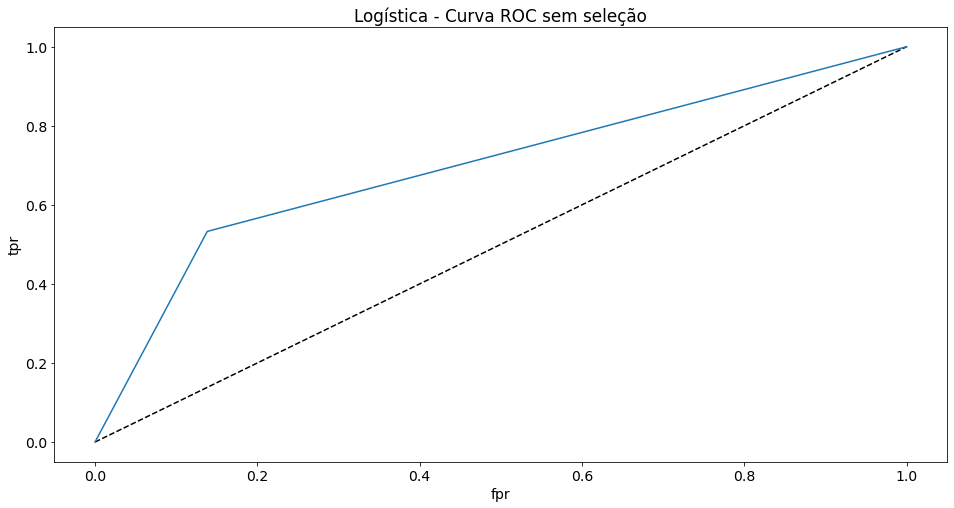

In [125]:
fpr, tpr, thresholds = roc_curve(y_teste_i, y_pred_i)


plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistica')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logística - Curva ROC sem seleção')
plt.show()

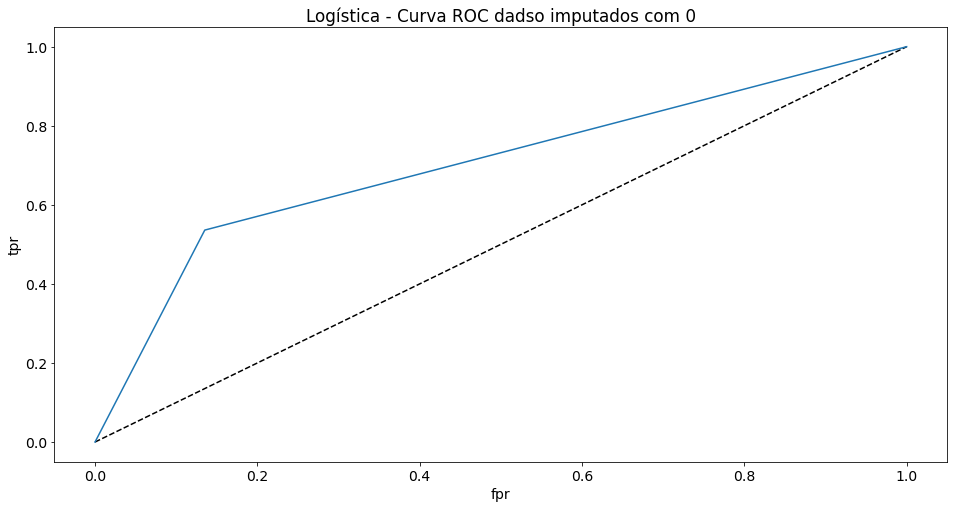

In [126]:
fpr, tpr, thresholds = roc_curve(y_teste_z, y_pred_z)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistica')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logística - Curva ROC dadso imputados com 0')
plt.show()

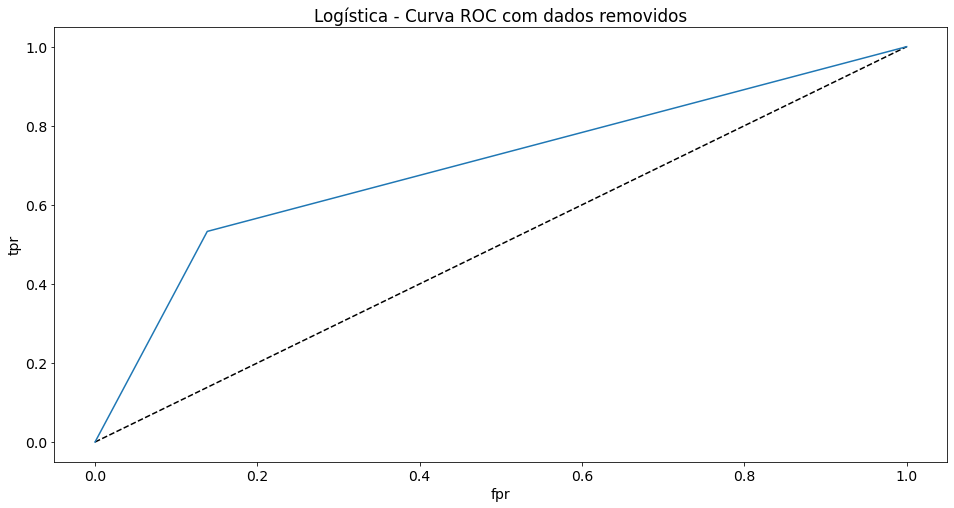

In [127]:
fpr, tpr, thresholds = roc_curve(y_teste_r, y_pred_r)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistica')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logística - Curva ROC com dados removidos')
plt.show()

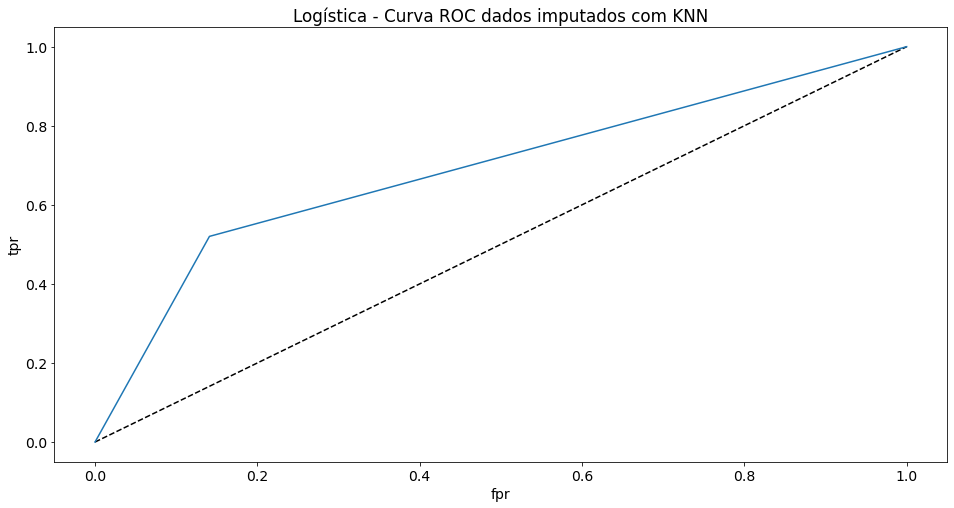

In [128]:
fpr, tpr, thresholds = roc_curve(y_teste_k, y_pred_k)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistica')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logística - Curva ROC dados imputados com KNN')
plt.show()

# Conclusões

Abaixo temos uma tabela com todas as métricas obtidas para todos os 4 tratamentos de dados feitos e os 8 modelos fitados. Vemos, então, que o tratamento de dados com o maior número de scores máximos (células em negrito) é o tratamento onde imputamos os dados -999.00 com 0, onde os modelos de regressão logística, árvore de decisão (entropia e índice de gini) e GBM. Mas, no geral, o método que apresentou melhores resultados foi o de florestas aleatórias, com média de score 0,83695, onde o tratamento que melhor deu resultados foi manter os dados originais. Em segundo lugar temos os dados tratados com imputação via KNN, que apresentou 3 maiores valores.

No entanto, tirando o SVM Linear, não houve uma correlação muito expressiva entre o método de tratamento dos dados e o modelo utilizado, todos apresentaram métricas semelhantes. Devido a natureza do problema exigir a maior acurácia possível e ser irrelevante dos resultados errados serem falsos positivos ou falsos negativos, temos que o melhor tratamento dos dados foi a imputação com 0 e a utilização do método de random forest.

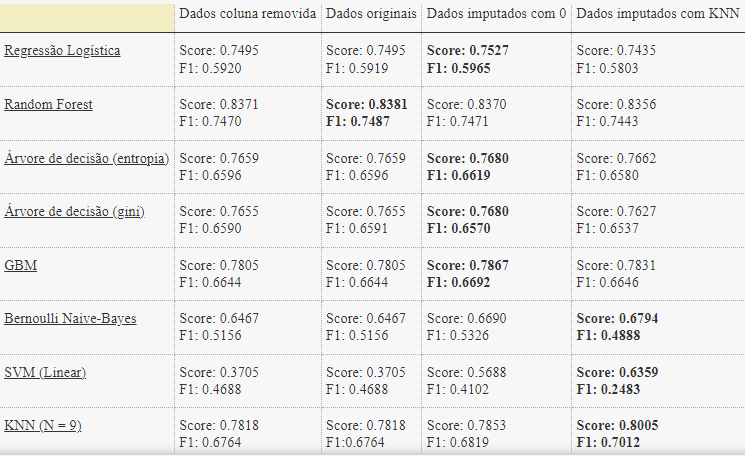